#### one-hot：独热编码

In [8]:
import torch
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_path = 'E:/ai_learning_resource/bikeshare/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
#对于类型变量的特殊处理
# season=1,2,3,4, weathersi=1,2,3, mnth= 1,2,...,12, hr=0,1, ...,23, weekday=0,1,...,6
# 经过下面的处理后，将会多出若干特征，例如，对于season变量就会有 season_1, season_2, season_3, season_4
# 这四种不同的特征。

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    #利用pandas对象，我们可以很方便地将一个类型变量属性进行one-hot编码，变成多个属性
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# 把原有的类型变量对应的特征去掉，将一些不相关的特征去掉
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


#### 数值类型变量的标准化处理

In [10]:
# 调整所有的特征，标准化处理
quant_features = ['cnt', 'temp', 'hum', 'windspeed']
# 我们将每一个变量的均值和方差都存储到scaled_features变量中。
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,3,13,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,8,32,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,5,27,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,3,10,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,0,1,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,11,108,-0.388467,1,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,8,81,-0.553859,1,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,7,83,-0.548346,1,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,13,48,-0.708224,1,0,...,0,1,0,0,1,0,0,0,0,0


#### 数据集划分

In [11]:
# 将所有的数据集分为测试集和训练集，我们以后21天数据一共21*24个数据点作为测试集，其它是训练集
test_data = data[-21*24:]
train_data = data[:-21*24]
# 将我们的数据列分为特征列和目标列
#目标列
target_fields = ['cnt','casual', 'registered']
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
# 将数据从pandas dataframe转换为numpy
X = features.values
Y = targets['cnt'].values
Y = Y.astype(float)
Y = np.reshape(Y, [len(Y),1])
losses = []
X

array([[ 0.        ,  0.        , -1.33460919, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -1.43847501, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -1.43847501, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        ,  0.        ,  0.11951233, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -0.19208513, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -0.19208513, ...,  0.        ,
         0.        ,  0.        ]])

#### 构建神经网络
10个隐含层，1个输出层（输出cnt自行车数量）

In [12]:
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128

neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)

0 0.98787296
100 0.27310482
200 0.24405596
300 0.17828701
400 0.11290421
500 0.08441467
600 0.07224214
700 0.06634504
800 0.06292957
900 0.060689397


Text(0, 0.5, 'MSE')

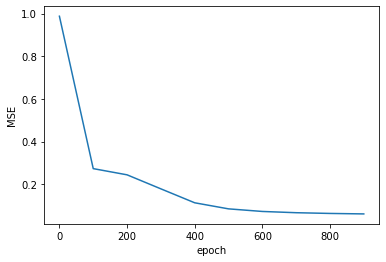

In [13]:
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)

# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype=torch.float)
        yy = torch.tensor(Y[start:end], dtype=torch.float)
#         print(xx.type(), yy.type())
        predict = neu(xx)
        loss = cost(predict, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

# 打印输出损失值
plt.plot(np.arange(len(losses))*100,losses)
plt.xlabel('epoch')
plt.ylabel('MSE')

#### 测试神经网络

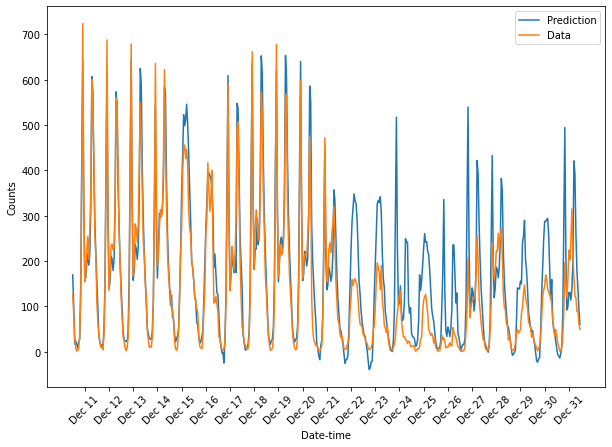

In [14]:
# 用训练好的神经网络在测试集上进行预测

targets = test_targets['cnt'] #读取测试集的cnt数值
targets = targets.values.reshape([len(targets),1]) #将数据转换成合适的tensor形式
targets = targets.astype(float) #保证数据为实数

# 将属性和预测变量包裹在Variable型变量中
x = torch.tensor(test_features.values, dtype=torch.float)
y = torch.tensor(targets, dtype=torch.float)

# 用神经网络进行预测
predict = neu(x)
predict = predict.data.numpy()

# 将后21天的预测数据与真实数据画在一起并比较
# 横坐标轴是不同的日期，纵坐标轴是预测或者真实数据的值

fig, ax = plt.subplots(figsize = (10, 7))
mean, std = scaled_features['cnt']
ax.plot(predict * std + mean, label='Prediction')
ax.plot(targets * std + mean, label='Data')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

# 对横坐标轴进行标注
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
# print(dates[12:60])
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

#### 剖析神经网络

In [25]:
def feature(X, net):
    ''' 模拟隐含层的计算过程，并返回激活数值 '''
    X = torch.from_numpy(X).float().requires_grad_(True)
    dic = dict(net.named_parameters())
    print(dic.keys())
    weights = dic['0.weight']
    biases = dic['0.bias']
    h = torch.sigmoid(X@weights.t() + biases.expand([len(X), len(biases)]))
    return h

In [26]:
bool1 = rides['dteday'] == '2012-12-22'
bool2 = rides['dteday'] == '2012-12-23'
bool3 = rides['dteday'] == '2012-12-24'

bools = [any(tup) for tup in zip(bool1, bool2, bool3)]
subset = test_features.loc[rides[bools].index]
subtargets = test_targets.loc[rides[bools].index]
subtargets = subtargets['cnt']
subtargets = subtargets.values.reshape([len(subtargets), 1])

In [27]:
results = feature(subset.values, neu).data.numpy()
predict = neu(torch.tensor(subset.values, dtype=torch.float)).data.numpy()
mean, std = scaled_features['cnt']
predict = predict * std + mean
subtargets = subtargets * std + mean

dict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])


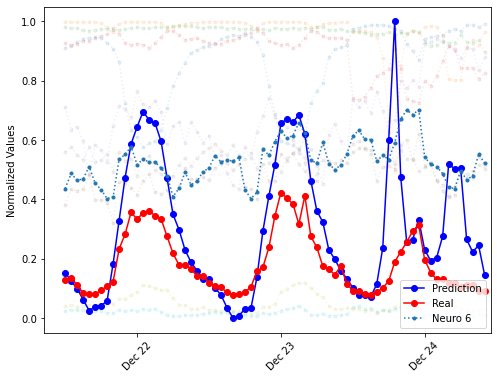

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(results[:, :], '.:', alpha=0.1)
ax.plot((predict - min(predict)) / (max(predict) - min(predict)), 'bo-', label='Prediction')
ax.plot((subtargets - min(predict)) / (max(predict) - min(predict)), 'ro-', label='Real')
ax.plot(results[:, 6], '.:', alpha=1, label='Neuro 6')

ax.set_xlim(right=len(predict))
ax.legend()
plt.ylabel('Normalized Values')

dates = pd.to_datetime(rides.loc[subset.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

我们想知道Neuro 6神经元表现较好的原因以及它的激活是由谁决定的。

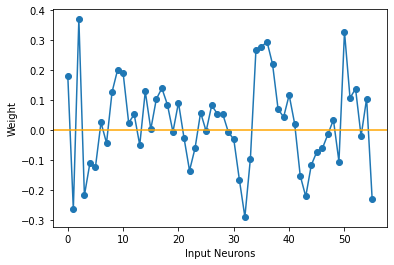

In [32]:
# 进一步分析从输入层到它的权重
dic = dict(neu.named_parameters())
weights = dic['0.weight']
plt.plot(weights.data.numpy()[6, :], 'o-')
plt.axhline(y=0,ls="-",c="orange")#添加水平直线
plt.xlabel('Input Neurons')
plt.ylabel('Weight')
plt.show()